https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

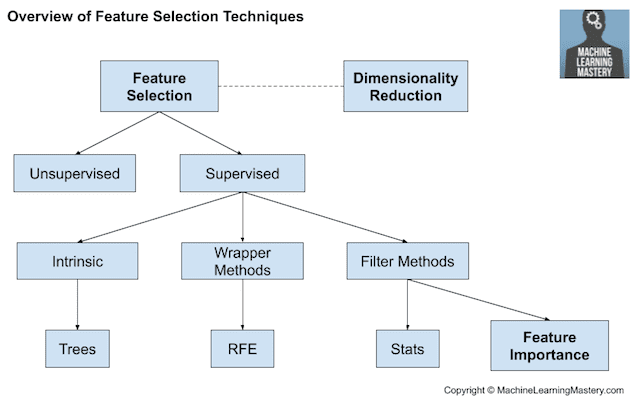

##### STATISTICS BASED BELOW

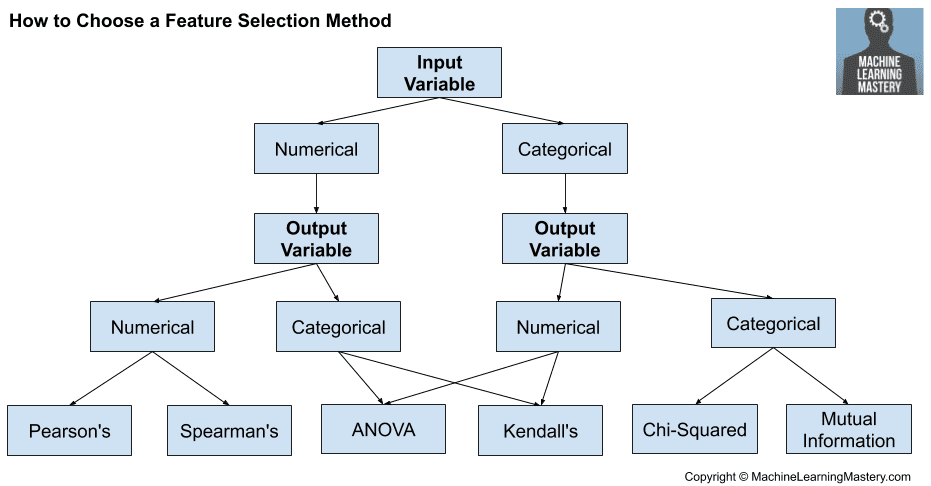

In [56]:
address='https://raw.githubusercontent.com/antony-joy/Data_sets/main/Stack_overflow%20usage_statistics.csv'
# Import pandas
import pandas as pd

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(address)

print(so_survey_df.dtypes)
so_survey_df

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"
...,...,...,...,...,...,...,...,...,...,...,...
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,France,NaN,Subversion,45,10,Male,NaN
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,"58,746.00"
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,"$55,000.00"
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,Sweeden,NaN,Git;Subversion,23,9,NaN,NaN


In [57]:
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend'], dtype='object')


In [58]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)
one_hot_encoded

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,OH_France,OH_India,OH_Ireland,OH_Russia,OH_South Africa,OH_Spain,OH_Sweeden,OH_UK,OH_USA,OH_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,NaN,Subversion,45,10,Male,NaN,1,0,0,0,0,0,0,0,0,0
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,8.0,Git,27,16,Male,"58,746.00",0,0,0,0,0,1,0,0,0,0
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,NaN,Git,54,16,Male,"$55,000.00",0,0,0,0,0,0,0,0,1,0
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git;Subversion,23,9,NaN,NaN,0,0,0,0,0,0,1,0,0,0


In [59]:
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

country_counts

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

In [60]:
# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
so_survey_df[['Paid_Job', 'ConvertedSalary']]

so_survey_df['Paid_Job'].mask(so_survey_df['ConvertedSalary'] >0, 1, inplace=True)      #replacing 1,2,3 of presence with 1
so_survey_df

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Paid_Job
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",1
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",1
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00",1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,France,NaN,Subversion,45,10,Male,NaN,0
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,"58,746.00",1
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,"$55,000.00",1
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,Sweeden,NaN,Git;Subversion,23,9,NaN,NaN,0


### BINNING

In [61]:
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']])

              equal_binned  ConvertedSalary
0                      NaN              NaN
1      (-2000.0, 400000.0]          70841.0
2                      NaN              NaN
3      (-2000.0, 400000.0]          21426.0
4      (-2000.0, 400000.0]          41671.0
..                     ...              ...
994                    NaN              NaN
995    (-2000.0, 400000.0]          58746.0
996    (-2000.0, 400000.0]          55000.0
997                    NaN              NaN
998  (800000.0, 1200000.0]        1000000.0

[999 rows x 2 columns]


In [62]:
# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins, labels = labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


### MISSING VALUES

In [63]:
# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [64]:
# Print the locations of the missing values
print(sub_df.isnull())

# Print the locations of the non-missing values
print(sub_df.notnull())

       Age  Gender
0    False   False
1    False   False
2    False    True
3    False   False
4    False   False
..     ...     ...
994  False   False
995  False   False
996  False   False
997  False    True
998  False    True

[999 rows x 2 columns]
      Age  Gender
0    True    True
1    True    True
2    True   False
3    True    True
4    True    True
..    ...     ...
994  True    True
995  True    True
996  True    True
997  True   False
998  True   False

[999 rows x 2 columns]


### OMMISION

In [65]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how='any')

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 14)


In [66]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 8)


In [67]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 14)


### IMPUTING

In [68]:
# Replace missing values
so_survey_df['Gender'].fillna(value='Not Given', inplace=True)

# Print the count of each value
so_survey_df['Gender']

0           Male
1           Male
2      Not Given
3           Male
4           Male
         ...    
994         Male
995         Male
996         Male
997    Not Given
998    Not Given
Name: Gender, Length: 999, dtype: object

In [69]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Print the first five rows of StackOverflowJobsRecommend column
so_survey_df['StackOverflowJobsRecommend']

0      7.061602
1      7.000000
2      8.000000
3      7.061602
4      8.000000
         ...   
994    7.061602
995    8.000000
996    7.061602
997    7.061602
998    7.061602
Name: StackOverflowJobsRecommend, Length: 999, dtype: float64

In [70]:

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


## DATA ISSUES----------------IMPORTANT

In [27]:
## SOMETIMES DATA MAY CONTAIN $ SIGN, COMMAS IN NUMBER ETC WHICH MAKES IT DIFFICULT TO PROCESS

In [79]:
############################### IMPORTANT STEP TO IDENTIFY DIFFERENT TYPES OF VALUE  ####################################

# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

idx

0      True
1      True
2      True
3      True
4      True
       ... 
994    True
995    True
996    True
997    True
998    True
Name: RawSalary, Length: 999, dtype: bool

In [80]:
# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

0               NaN
1         70,841.00
2               NaN
3         21,426.00
4        £41,671.00
           ...     
994             NaN
995       58,746.00
996      $55,000.00
997             NaN
998    1,000,000.00
Name: RawSalary, Length: 995, dtype: object


In [53]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

In [54]:
# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

There will often be values deep within a column that are preventing you from casting a column as a numeric type so that it can be used in a model or further feature engineering.

One approach to finding these values is to force the column to the data type desired using pd.to_numeric(), coercing any values causing issues to NaN, Then filtering the DataFrame by just the rows containing the NaN values.

Try to cast the RawSalary column as a float and it will fail as an additional character can now be found in it. Find the character and remove it so the column can be cast as a float.

In [51]:
############ so 1. find all values which are not null--> like values having comma, $, etc... convert them accordingly

############ so 3.convert to numeric

############ 4.select rows which are non Nan

############ 5. impute them with values removing $,comma, etc

In [31]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


##### METHOD CHAINING

In [81]:
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')
 
# Print the RawSalary column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


## Data distributions


In [89]:
so_survey_df.dtypes

SurveyDate                      object
FormalEducation                 object
ConvertedSalary                float64
Hobby                           object
Country                         object
StackOverflowJobsRecommend     float64
VersionControl                  object
Age                              int64
Years Experience                 int64
Gender                          object
RawSalary                      float64
Paid_Job                         int64
equal_binned                  category
boundary_binned               category
dtype: object

In [90]:
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int64', 'float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience', 'RawSalary', 'Paid_Job'],
      dtype='object')


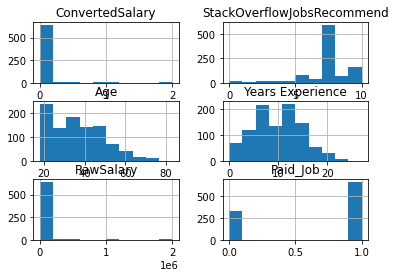

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

############## if we use just hist to DF, it will create df with only numeric columns 

# Create a histogram
so_survey_df.hist()
plt.show()

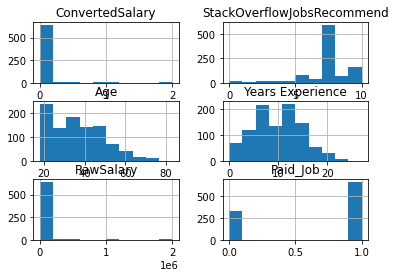

In [92]:
so_numeric_df.hist()
plt.show()

In [93]:
###### we can see from hist that many are unevenly distributed   ############33

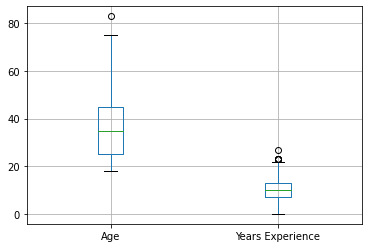

In [94]:
#################### Create a boxplot of two columns  ############################

so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

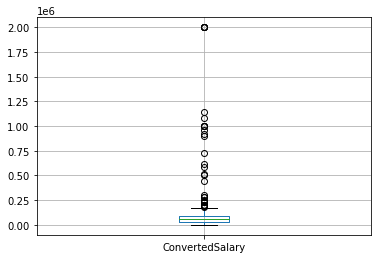

In [95]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

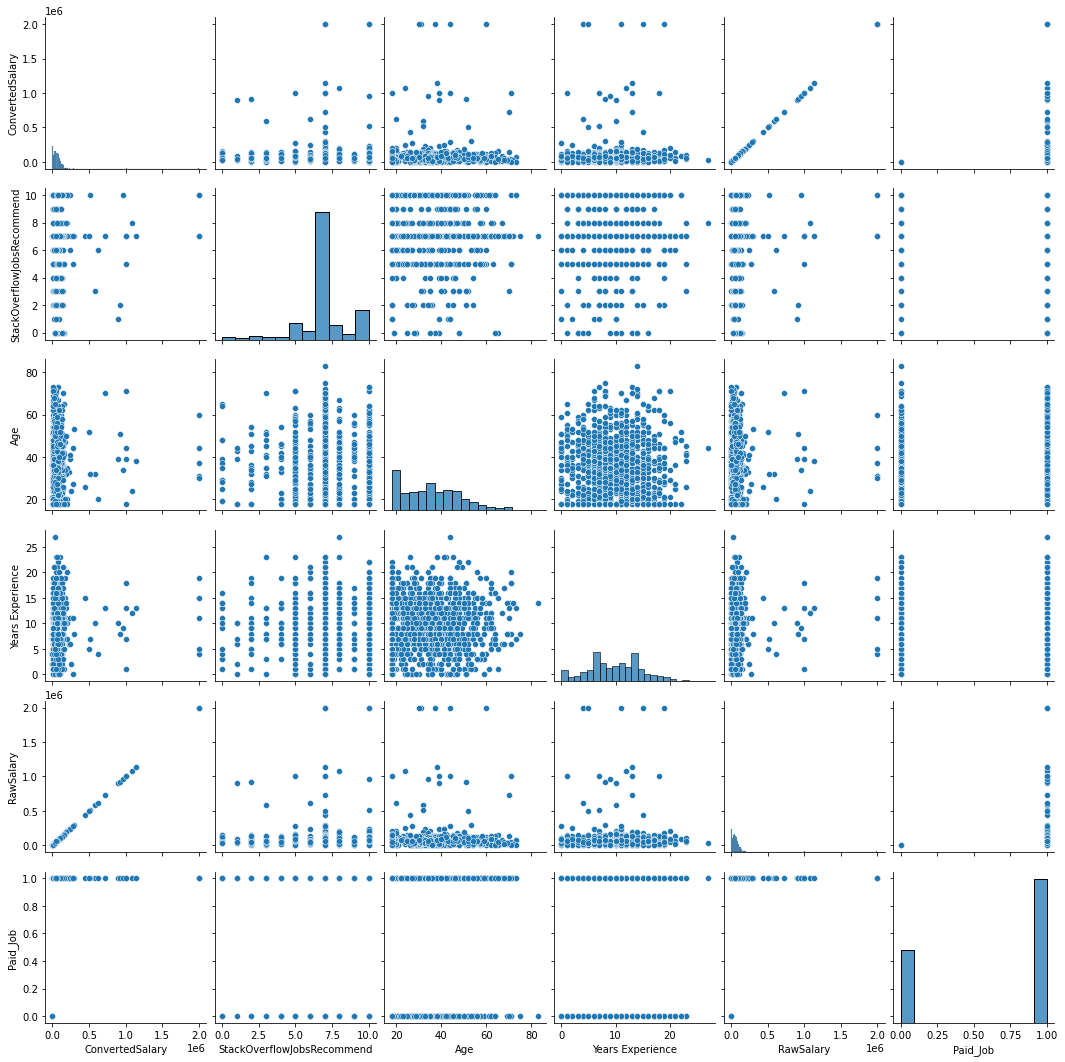

In [96]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

In [97]:
# Print summary statistics
print(so_numeric_df.describe())

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  999.000000  999.000000   
mean      9.256517e+04                    7.030030   36.003003   
std       2.091344e+05                    1.829698   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    7.000000   25.000000   
50%       5.556200e+04                    7.000000   35.000000   
75%       8.823800e+04                    7.000000   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience     RawSalary    Paid_Job  
count        999.000000  6.650000e+02  999.000000  
mean           9.961962  9.256517e+04    0.663664  
std            4.878129  2.091344e+05    0.472692  
min            0.000000  0.000000e+00    0.000000  
25%            7.000000  2.755000e+04    0.000000  
50%           10.000000  5.556200e+04    1.000000  
75%           13.000000  8.823800e+04    

### Scaling and transformations

SCALING MAYBE AFFECTED WITH PRESENCE OF OUTLIER. ROBUST TRANSFOMATION IS BETTER WHEN THERE ARE OUTLIERS.

#### Scaling data
For example it is difficult to compare salary values (often measured in thousands) with ages as shown here. While this assumption of similar scales is necessary, it is rarely true in real world data. For this reason you need to rescale your data to ensure that it is on the same scale. 

#Let’s say your data set has variables with different unit like one is in KM and another one in CM (centimeter) but both have same change in value so here for variable in KM will reflect minor change where as another one will have higher change. In this case, if we do not standardize the variable PCA will give higher preference to centimeter variable.

#In another scenario, if variables of data-set have same units of measurement and values may lie in the range of 70-130 for one variable but for other one in between 2-8 for all the records. Here PCA will give more weight to the first variable. Here standardization is required to tackle these issues.


##### Min-Max scaling
While here after min-max scaling, although the distribution is the same, the values sit fully between 0 and 1.



##### Standard Scaler
The other commonly used scaler is called standardization. As opposed to finding an outer boundary and squeezing everything within it, standardization instead finds the mean of your data and centers your distribution around it, calculating the number of standard deviations away from the mean each point is. These values (the number of standard deviations) are then used as your new values. This centers the data around 0 but technically has no limit to the maximum and minimum values as you can see here.

##### ROBUST scaler
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%


##### Log Transformation
Both normalization and min-max scaling are types of scalers, in other words the data remained in the same shape but was squashed or scaled. A log transformation on the other hand can be used to make highly skewed distributions less skewed.


In [98]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


<ipython-input-98-78746af5d47f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])


In [99]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


<ipython-input-99-c8058629ed8a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])


In [ ]:

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

plt.hist(df_robust_scaler['Age'],bins=20)


Right-skewed distributions?


It is useful if and only if the distribution of the target variable is right-skewed which can be observed by a simply histogram plot. This occurs when there are outliers that can't be filtered out as they are important to the model.

What about left-skewed distributions?
A log transformation in a left-skewed distribution will tend to make it even more left skew, for the same reason it often makes a right skew one more symmetric. It will only achieve to pull the values above the median in even more tightly, and stretching things below the median down even harder.

In that cases power transformation can be of help.

Log transformation

In the previous exercises you scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population.

Power transformation

Left-skewed distributions can become more symmetric by taking a power (greater than 1, square), or by exponentiating.

<ipython-input-100-09e21efa5f14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])


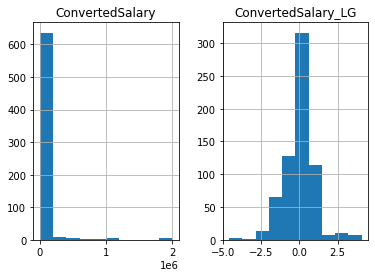

In [100]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

## Removing outliers

#####  IF OUR FEATURES HAVE A LOT OF OUTLIERS THEN, WE SHOULD SHOULD NOT IMPUTE USINF MEAN, USE MODE OR MEDIAN

You will often find that even after performing SCALING & TRANSFORAMTIONS, your data is still very skewed. This can often be caused by outliers existing in your data.

What are outliers?
Outliers are data points that exist far away from the majority of your data. This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way you will often want to remove these values as they can negatively impact your models.

#### Quantile/percentage based detection
The first approach we will discuss is to remove a certain percentage of the largest and/or smallest values in your data. For example you could remove the top 5%. This is achieved by finding the 95th quantile (the point below which 95% of your data resides) and removing everything above it. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no real outliers, you will still be removing the top 5% of values from the dataset.


#### Standard deviation/statistical based detection
An alternative, and perhaps more statistically sound method of removing outliers is to instead choose what you consider to be outliers based on the mean and standard deviations of the data set. For example you may want to eliminate all data greater than 3 standard deviations from the mean as you expect those data points to be outliers. This approach has the benefit of only removing genuinely extreme values, for example if only one value was an outlier, only that value would be effected.

###### Note that it is only in very rare cases that you would want to remove outliers from your test set

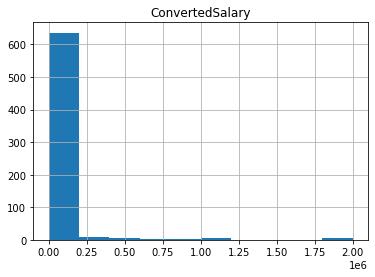

<Figure size 432x288 with 0 Axes>

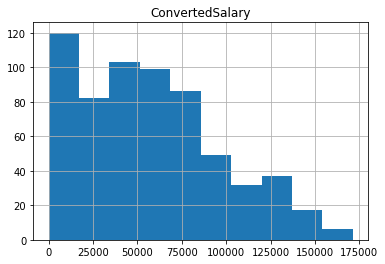

In [101]:
############ QUANTILE BASED ############


# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

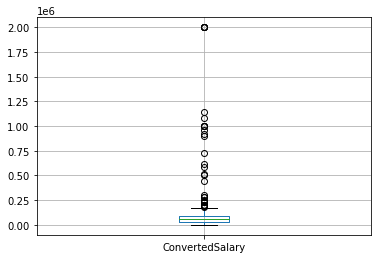

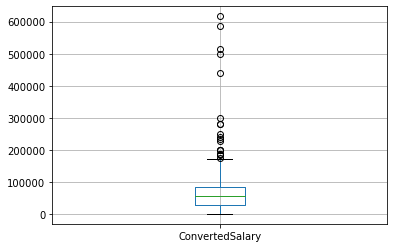

In [105]:
############ STATISTICAL BASED ############


### BOXPLOT WITHOUT REMOVING OUTLIER  ####
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()
plt.clf()

# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
#Trim the so_numeric_df DataFrame to retain all rows where ConvertedSalary is within the lower and upper bounds.
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

#### Train and testing transformations (I)
So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.
To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. You should never retrain a scaler on the test set.

In [106]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

NameError: name 'so_train_numeric' is not defined

Train and testing transformations (II)
Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated only from the train set to remove outliers from the test set.

Similar to the last exercise, we split the so_numeric_df DataFrame into train (so_train_numeric) and test (so_test_numeric) sets.

In [107]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

NameError: name 'so_train_numeric' is not defined